In [1]:
import numpy as np
from fft_tdse_simulator.simulator import *
from fft_tdse_simulator.animator import *
import matplotlib.colors as colors
import matplotlib.pyplot as plt


In [2]:
x_min = -10
x_max = 10
y_min = -10
y_max = 10
nx = 1024
ny = 1024

def potential(x, y):
    r2 = x*x+y*y
    return 10 * (r2 < 1.0)


def init_wavefunction(x, y, sigma_x = 1.0, sigma_y = 1.0, k_x = 10.0, k_y = 0.0, x0 = -5.0, y0 = 0):
    norm = 1.0/np.sqrt(sigma_x*sigma_y*np.pi)
    return np.exp(-(x-x0)**2/(2*sigma_x) - (y-y0)**2/(2*sigma_y) + 1j*k_x*x + 1j*k_y*y) * norm

In [3]:
sim = Simulator(verbose=True)
sim.set_dimension(2)
sim.set_initial_condition(lambda x, y: init_wavefunction(x, y))
sim.set_mass(10.0)
sim.set_potential(lambda x, y: potential(x,y))
sim.set_grid([x_min, y_min], [x_max, y_max], [nx, ny])
sim.set_time_parameters(0.0, 10.0, 4000)
sim.prepare()






ic

|

message

:

'

Dimension set to 2

'

ic

|

message

:

'

Initial condition set.

'

ic

|

self

.

initial_psi_fun

:

<

function

<

lambda

>

at

0x139bcc820

>

ic

|

'

Time grid:

'

ic

|

self

.

t0

:

0.0

,

self

.

t1

:

10.0

,

self

.

n_steps

:

4000

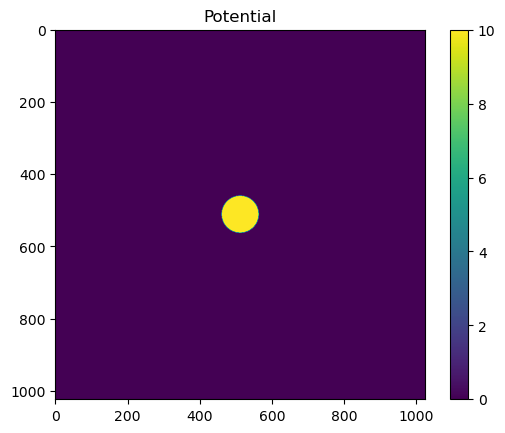

In [4]:
plt.figure()
plt.imshow(sim.ham.V)
plt.title('Potential')
plt.colorbar()
plt.show()

In [5]:
anim1 = Animator2d(sim, folder='./frames1/')
anim1.vis_type = 'complex'
anim1.show_axis = False

anim2 = Animator2d(sim, folder='./frames2/')
anim2.vis_type = 'magnitude'
anim2.show_axis = False

anim1.set_interval(10)
anim1.set_framesize(1024, 1024)
anim2.set_interval(10)
anim2.set_framesize(1024, 1024)

# initialize figure, and add potential visualization
anim1.init_figure()
anim1.add_potential_visualization_2d()
anim2.init_figure()
anim2.add_potential_visualization_2d()


anim_callback1 = anim1.get_callback()
anim_callback2 = anim2.get_callback()

def callback(sim):
    anim_callback1(sim)
    anim_callback2(sim)
    
sim.simulate(callback=callback)
anim1.make_movie("cylinder_scattering_complex.mp4")
anim1.clean_frames()
anim2.make_movie("cylinder_scattering_magnitude.mp4")
anim2.clean_frames()

ic

|

self

.

format

:

'

./frames1/frame

%05d

.png

'

ic

|

self

.

format

:

'

./frames2/frame

%05d

.png

'

ic

|

'

Running simulation...

'

  0%|          | 0/4000 [00:00<?, ?it/s]